In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product
import numba

In [2]:
def peak_grid(zero, v1, v2, xes, yes, delta, exclude = ()):
    zero = np.array(zero)
    v1 = np.array(v1)
    v2 = np.array(v2)
    coords = [zero + v1*x + v2*y + delta*np.random.randn(2) for (x, y) in product(xes, yes) if not (x, y) in exclude]
    return coords


def ring_filter(center, r1, r2):
    center = np.array(center)
    def f(pair):
        d = np.linalg.norm(center - pair)
        return (d > r1) and (d < r2)
    return f

In [3]:
f1 = ring_filter((0,0), 0, 3)

coords_1 = peak_grid((0,0), (0.7, 0.39), (0.7, -0.39), np.arange(-5, 5), np.arange(-5, 5), 0.01)
coords_1 = [p for p in coords_1 if f1(p)]
coords_1 = np.array(list(coords_1)).T

f2 = ring_filter((3,3), 3, 5)
f3 = ring_filter((0,0), 0, 2.5)
coords_2 = peak_grid((0,0), (0.6, 0.4), (0.3, -0.8), np.arange(-5, 5), np.arange(-5, 5), 0.01, ((0,0),))
coords_2 = [p for p in coords_2 if f2(p) and f3(p)]
coords_2 = np.array(list(coords_2)).T

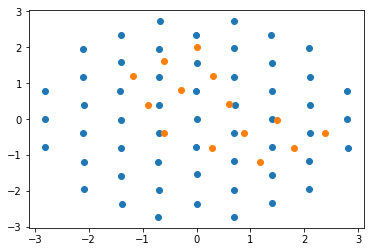

In [4]:
fig, axes = plt.subplots()
axes.scatter(coords_1[0], coords_1[1])
axes.scatter(coords_2[0], coords_2[1])

In [5]:
coords = np.concatenate((coords_1, coords_2), axis=1)

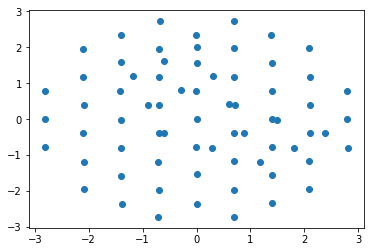

In [6]:
fig, axes = plt.subplots()
axes.scatter(coords[0], coords[1])

In [18]:
coords_T = coords.T
pairs = []

for i in range(len(coords_T)):
    for j in range(i+1, len(coords_T)):
        delta = coords_T[j] - coords_T[i]
        d = np.linalg.norm(delta)
        alpha = np.arctan2(delta[0], delta[1])/np.pi*180
        pairs.append((d, alpha, i, j))
        
pairs = np.array(pairs).T

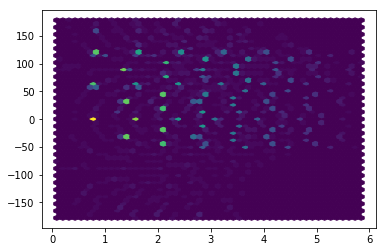

In [19]:
fig, axes = plt.subplots()
axes.hexbin(pairs[0], pairs[1], gridsize=50)